In [152]:
from glob import glob
import os

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import scipy.io
import pandas as pd
import h5py
# optional - turn off warnings
import warnings
warnings.filterwarnings('ignore')

os.chdir('/users/marianne/documents/pe_snow_fires/')

In [192]:
## bring in sierra nevada range
filepath = '/users/marianne/documents/data/watershed_masks/'
files = os.listdir(filepath)
tmp_list=[]
for f in files:
    try:
        mask = h5py.File(filepath + f)
        name = f.split('_watershed')[0]
        outline = mask[name+'_watershed_outline_coords']
        points = gpd.points_from_xy(outline['x'][0],outline['y'][0])
        poly = Polygon(points)
        # use the feature loop in case you polygon is a multipolygon
        features = [i for i in range(1)]
        tmp_list.append({'geometry': [poly]})
    except:
        continue

gdf = gpd.GeoDataFrame(tmp_list,crs=4326)


In [218]:
file = os.listdir("/users/marianne/documents/pe_snow_fires/watershed_bounds/")
path = [os.path.join("/users/marianne/documents/pe_snow_fires/watershed_bounds", i) for i in file if ".shp" in i]

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

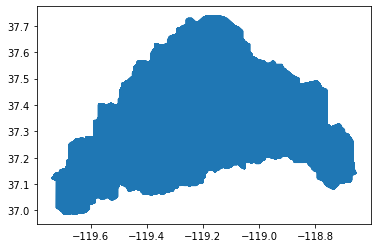

In [61]:
plt.plot(outline['x'][0], outline['y'][0])
plt.show()

In [219]:
gdf

,FID,geometry
0,0,"POLYGON ((-121.17542 38.73486, -121.17542 38.7..."
1,0,"POLYGON ((-119.99208 38.70986, -119.45847 38.9..."
2,0,"POLYGON ((-121.58375 39.91403, -121.58375 39.9..."
3,0,"POLYGON ((-119.00847 36.40181, -119.00847 36.4..."
4,0,"POLYGON ((-118.64208 35.97431, -118.64208 35.9..."
5,0,"POLYGON ((-119.42097 36.93931, -119.42097 36.9..."
6,0,"POLYGON ((-120.33375 37.71403, -119.25847 37.7..."
7,0,"POLYGON ((-120.87542 38.29319, -120.87542 38.2..."
8,0,"POLYGON ((-119.32083 37.97056, -118.66639 38.1..."
9,0,"POLYGON ((-119.10417 37.72083, -119.10417 37.7..."


In [108]:
san_joaquin = gpd.read_file('Poly.shp')

<AxesSubplot:>

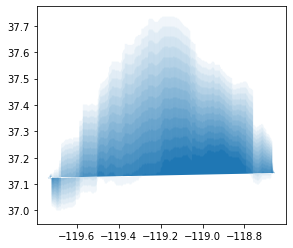

In [182]:
san_joaquin.plot()

In [2]:
files = os.listdir('pedata')
f = os.path.join(os.getcwd(),'pedata',files[1])

RasterioIOError: yuba_watershed_mask.mat: No such file or directory

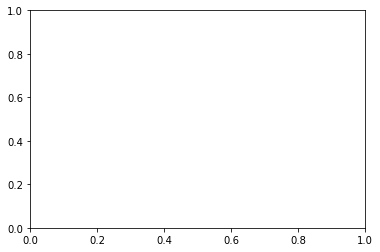

In [220]:
fig,ax=plt.subplots()
pe = rxr.open_rasterio(f,decode_times=False)
ep.plot_bands(pe,ax=ax,cmap='Blues',vmin=0, vmax=np.nanmax(pe.data))

In [221]:
envgdf = gdf #gpd.GeoDataFrame(gdf)

sj_geom = envgdf.to_crs(pe.rio.crs)

from rasterio.plot import plotting_extent
#  Create a box representing the spatial extent of your data
crop_bound_box = [box(*envgdf.total_bounds)]
# Clip the data by  chaining together rio.clip with rio.open_rasterio
# from_disk=True allows you to only open the data that you wish to work with
pe_clip = pe.rio.clip(crop_bound_box, crs=envgdf.crs,
                                    # Include all pixels even partial pixels
                                    all_touched=True,
                                    from_disk=True).squeeze()


pe_ext = plotting_extent(pe_clip,
                            pe_clip.rio.transform())


<AxesSubplot:title={'center':'2016-09-09'}>

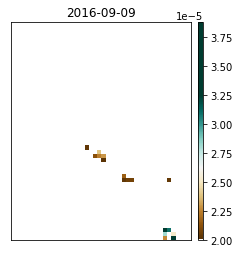

In [222]:
import matplotlib
cols = cm.get_cmap('BrBG', 256)
newcolors = cols(np.linspace(0, 1.5, 256))
white = np.array([1,1,1,0])
newcolors[:1, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

fig,ax=plt.subplots()
# Plotting Bounds Clip
maxval=np.nanmax(pe_clip.values)
pe_clip = pe.rio.clip(sj_geom.geometry,
                    all_touched=True,
                    from_disk=True)
ep.plot_bands(pe_clip,
            ax=ax,
            extent=pe_ext,
            cbar=True, 
            cmap = newcmp,
            title = '2016-09-09',
            vmin=2e-5, vmax=maxval)

In [71]:
f

'/Users/marianne/earth-analytics/pedata/NCALDAS_NOAH0125_D.A20160909.002.nc4.SUB.tif'

In [113]:
os.chdir('/users/marianne/documents/pe_snow_fires/')
data = np.load('pedata/pe_monthly_2000_12.npy')

<AxesSubplot:title={'center':'2016-09-09'}>

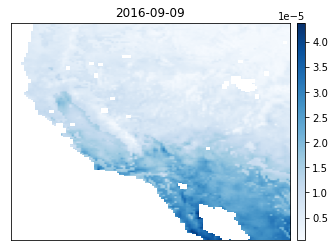

In [115]:
fig,ax=plt.subplots()
ep.plot_bands(data,
            ax=ax,
            extent=pe_ext,
            cbar=True, 
            cmap = 'Blues',
            title = '2016-09-09')
            #vmin=2e-5, vmax=maxval)